# 📘 Logistic Regression 逻辑回归

## 一、模型简介

逻辑回归是一种用于二分类问题的基础模型，尽管名称中包含“回归”，它本质上是一种分类算法。其核心思想是将线性模型输出映射为概率，再基于概率进行分类。

常见应用包括：

- 邮件是否为垃圾邮件
- 用户是否点击广告
- 是否患有某种疾病

### ✅ 主要特点

- 模型结构简单，训练快速
- 输出概率值，可解释性强
- 可扩展为多分类（Softmax）
- 可加正则项（L1 / L2）防止过拟合

---

## 二、数学原理（Logistic Regression）

### 🧩 1. 问题定义

我们有训练数据：

$$
\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)})\}
$$

其中：

- $x^{(i)} \in \mathbb{R}^n$: 第 $i$ 个样本的输入特征
- $y^{(i)} \in \{0, 1\}$: 类别标签（0或1）

---

### 📈 2. 模型假设（Hypothesis Function）

逻辑回归预测的是输入属于正类（1）的概率：

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-\boldsymbol{\theta}^T \boldsymbol{x}}}
$$

其中：

- $\sigma(z)$ 为 Sigmoid 函数
- 输出 $\hat{y} \in (0, 1)$，可解释为属于正类的概率

---

### 🎯 3. 决策边界（Decision Boundary）

根据预测概率进行分类：

- 若 $\hat{y} \geq 0.5$，预测为类别 1
- 若 $\hat{y} < 0.5$，预测为类别 0

实际中可调整阈值以优化 Precision 或 Recall。

---

### 🎯 4. 损失函数（Binary Cross-Entropy）

逻辑回归使用对数损失函数：

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

该函数来源于最大似然估计，是一个凸函数，优化稳定。

---

### 🧮 5. 梯度下降法（Gradient Descent）

参数更新规则如下：

$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$

其中每一维的导数为：

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

和线性回归的梯度形式几乎一致，只是 $\hat{y}$ 是 sigmoid 输出。

---

## 三、分类模型评估指标

逻辑回归输出的是概率，最终需将预测转换为类别，因此分类模型评估指标包括：

| 指标         | 说明 |
|--------------|------|
| Accuracy      | 正确预测样本比例 |
| Precision     | 正类预测中为真的比例 |
| Recall        | 实际正类中被正确预测的比例 |
| F1-score      | Precision 和 Recall 的调和均值 |
| ROC AUC       | 分类排序能力 |
| Confusion Matrix | 分类结果分布表（TP、FP、FN、TN） |

---

## 📐 四、几何解释

逻辑回归是一个线性分类器，目标是在特征空间中找到一个超平面将两个类别分开。

其非线性性体现在输出上 —— 线性组合后的输出经过 sigmoid 映射为 $(0,1)$ 的概率。

---

## 🔧 五、可扩展模块（可选）

- **L2 正则项**：抑制过拟合，加入 $\frac{\lambda}{2} \|\theta\|^2$
- **L1 正则项**：特征选择（稀疏解）
- **Softmax 多分类**：用于多类别问题（如数字识别）
- **可视化决策边界**：在 2D 平面直观展示分类效果

---

> 📌 Logistic Regression 是分类问题中最基础但也最强大的线性模型之一，掌握它是后续理解神经网络、最大熵模型、SVM 等更高级模型的基础。


## 👨‍💻 Implementation Checklist

1. 数据准备与可视化（模拟或真实数据）
2. 实现 sigmoid 函数
3. 实现损失函数 J(θ)
4. 实现梯度下降（或使用 sklearn 优化器对比）
5. 模型训练与收敛可视化
6. 分类阈值调整与评估指标输出
7. 决策边界可视化（2D 数据集）
8. 添加正则项并观察效果（L1 vs L2）


In [8]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_pipeline import load_bank_data, build_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [9]:
# 加载数据
X, y, categorical_cols, numerical_cols = load_bank_data('../../classification_data/bank/bank.csv')

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 构建 Pipeline
pipeline = build_pipeline(numerical_cols, categorical_cols, LogisticRegression(max_iter=1000))

# 模型训练与评估
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [10]:
y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[777  24]
 [ 73  31]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.56      0.30      0.39       104

    accuracy                           0.89       905
   macro avg       0.74      0.63      0.67       905
weighted avg       0.87      0.89      0.88       905



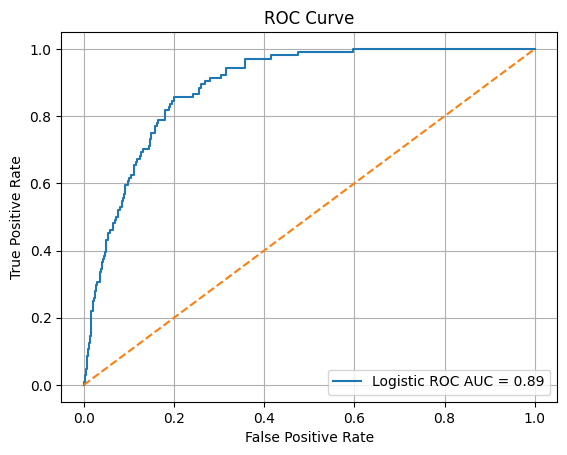

In [11]:
#Print ROC
y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Logistic ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

##Potential Tuning

In [16]:
#Find Best parameter

from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': [100, 200]
}

In [17]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__max_iter': [100, 200],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

In [18]:
print("Best Parameters:", grid.best_params_)
print("Best AUC Score:", grid.best_score_)

# 在测试集上评估最优模型
from sklearn.metrics import roc_auc_score
best_model = grid.best_estimator_
y_score = best_model.predict_proba(X_test)[:, 1]
print("Test AUC:", roc_auc_score(y_test, y_score))

Best Parameters: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 200, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best AUC Score: 0.896902815964282
Test AUC: 0.891409776241237


# 手撕实现 Logistic Regression（Binary Classification）


---

## 实现步骤计划

### 1 数据加载与可视化
- 分割训练集和测试集
- 可视化特征分布和类别标签

---

### 2 实现基础组件（Numpy）
- Sigmoid 函数 `sigmoid(z)`

- 损失函数（二元交叉熵）
$$
J(\theta) = -\frac{1}{m} \sum_i \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right]
$$

- 梯度计算
- 参数初始化

---

### 3 训练主循环（Gradient Descent）
- 每轮更新 θ：
  $$
  \theta := \theta - \eta \cdot \nabla_\theta J(\theta)
  $$
- 打印 loss 每 100 epoch 查看收敛情况

---

### 4 实现预测函数
- 将 `sigmoid(θ·x)` 输出转换为 0/1 预测
- 可以设定分类阈值（默认 0.5）

---

### 5 模型评估
- 输出 Accuracy、Precision、Recall、F1-score
- 绘制 ROC 曲线 + AUC

---

### 6 进阶扩展（可选）
- 加入 L2 正则项
- 支持 Mini-batch SGD
- 可视化决策边界（若为 2D 数据）


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: 加载数据
df = pd.read_csv('../../classification_data/bank/bank.csv', sep=';')

# Step 2: 目标变量编码
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Step 3: 区分特征类型
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# 移除目标列 'y'
if 'y' in categorical_cols:
    categorical_cols.remove('y')
if 'y' in numerical_cols:
    numerical_cols.remove('y')

# Step 4: One-Hot 编码类别特征
df_cat = pd.get_dummies(df[categorical_cols], drop_first=True)

# Step 5: 标准化数值特征
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# ✅ Step 6: 拼接所有特征，并强制为 float 类型
X_all = pd.concat([df_num, df_cat], axis=1).astype(np.float64).values
y_all = df['y'].astype(np.float64).values.reshape(-1, 1)

# Step 7: 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 最终确认输出
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X dtype:", X_train.dtype)
print("y dtype:", y_train.dtype)


X_train shape: (3616, 42)
y_train shape: (3616, 1)
X dtype: float64
y dtype: float64


In [22]:
class LogisticRegression_hand:
    def __init__(self, lr=0.1, num_iter=1000, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self.theta = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def binary_ce(self, X, y):
        m = X.shape[0]
        z = X @ self.theta
        y_pred = self.sigmoid(z)
        eps = 1e-8
        return -(1/m) * np.sum(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

    def gradient(self, X, y):
        m = X.shape[0]
        z = X @ self.theta
        y_pred = self.sigmoid(z)
        grad = (1/m) * X.T @ (y_pred - y)
        return grad

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])         # 添加偏置项
        self.theta = np.zeros((X.shape[1], 1))               # 初始化 theta
        y = y.reshape(-1, 1)                                 # 确保 y 是列向量

        for i in range(self.num_iter):
            loss = self.binary_ce(X, y)
            grad = self.gradient(X, y)
            self.theta -= self.lr * grad
            self.loss_history.append(loss)

            if self.verbose and i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X @ self.theta)

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)


In [23]:
model = LogisticRegression_hand(lr=0.001, num_iter=1000)

print(X_train.dtype)
print(y_train.dtype)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

float64
float64
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6443
Epoch 200, Loss: 0.6028
Epoch 300, Loss: 0.5675
Epoch 400, Loss: 0.5372
Epoch 500, Loss: 0.5112
Epoch 600, Loss: 0.4888
Epoch 700, Loss: 0.4694
Epoch 800, Loss: 0.4525
Epoch 900, Loss: 0.4377
Accuracy: 0.8861878453038674
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       801
         1.0       1.00      0.01      0.02       104

    accuracy                           0.89       905
   macro avg       0.94      0.50      0.48       905
weighted avg       0.90      0.89      0.83       905



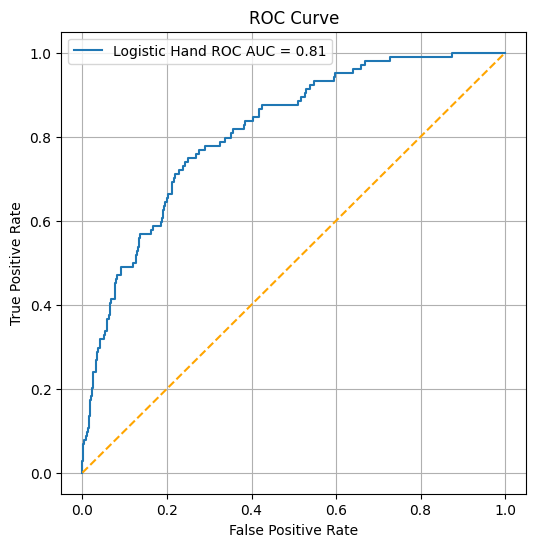

In [24]:
y_score = model.predict_proba(X_test)

# 计算 ROC 曲线 和 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘图
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Logistic Hand ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
